# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 898 kB/s eta 0:00:01
     |████████████████████████████████| 123 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 3.2 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 1.7 MB/s eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=d73b4868a453ef28cb9038b8b0966e10fbeb6786e4d171f9a21b7cfe26f0eced
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


In [3]:
pip install --upgrade ipykernel jupyter-client jupyter-core prompt-toolkit traitlets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 688 kB/s  eta 0:00:01
     |████████████████████████████████| 386 kB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 61.5 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 793 kB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 423 kB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 74.6 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 62.0 MB/s eta 0:00:01
ERROR: jupyter-client 7.4.9 has requirement pyzmq>=23.0, but you'll have pyzmq 19.0.0 which is incompatible.
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.0
    Uninstalling ipykernel-4.10.0:
      

In [4]:
pip install --upgrade pyzmq

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 908 kB 831 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [6]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# Define transforms
transform = transforms.ToTensor()

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=100)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**To convert an image data set into a tensor.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


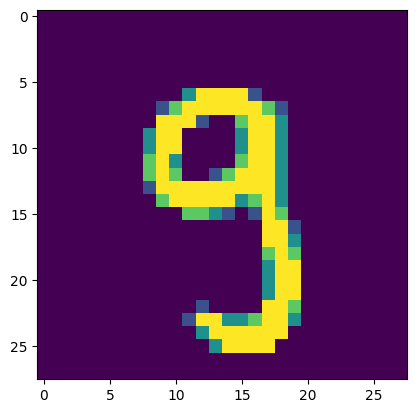

9


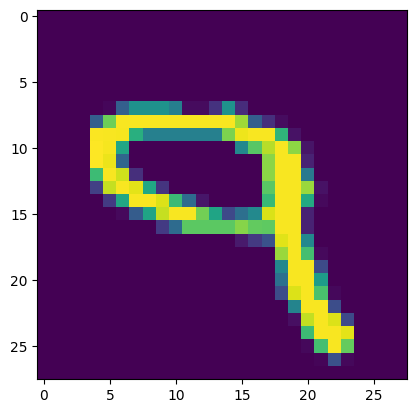

5


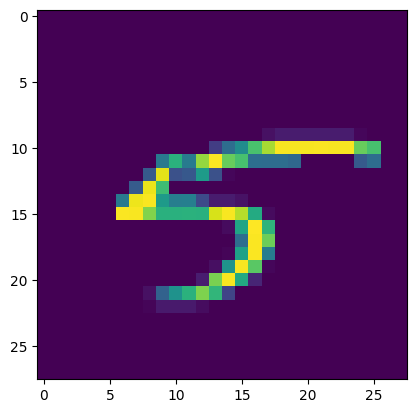

0


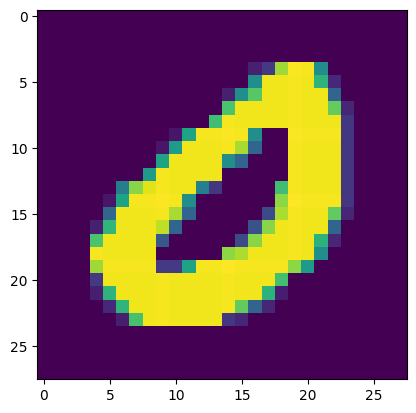

7


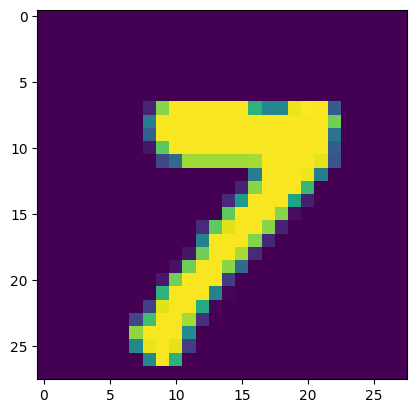

Training set size: 60000
Test set size: 10000
Image shape: torch.Size([1, 28, 28])
Label: 5


In [9]:
# Explore data
## YOUR CODE HERE ##
# Explore data
# Show 5 images from the training set
show5(train_loader)

# Explore dimensions of the dataset
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))
image, label = train_data[0]
print("Image shape:", image.shape)
print("Label:", label)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
## YOUR CODE HERE ##
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST digits
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SimpleNN()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
## YOUR CODE HERE ##
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Instantiate the model
model = SimpleNN()


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define your neural network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create the model
net = SimpleNN().to(device)

# Specify the loss function
criterion = nn.CrossEntropyLoss()

# Specify the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Custom transformation class to make tensors writable
class ToWritableTensor(object):
    def __call__(self, pic):
        return transforms.functional.to_tensor(pic).clone()

# Apply custom transformation
transform = ToWritableTensor()

# Load data with the new transform
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Now you can proceed with your training or any other operations with train_loader


In [10]:
#train_model(net, optimizer, criterion, train_loader, num_epochs = 10)

Epoch 1 training accuracy: 89.25% training loss: 0.38959
Epoch 1 validation accuracy: 94.41% validation loss: 0.19195
Epoch 2 training accuracy: 95.04% training loss: 0.16839
Epoch 2 validation accuracy: 95.94% validation loss: 0.13568
Epoch 3 training accuracy: 96.46% training loss: 0.11728
Epoch 3 validation accuracy: 97.43% validation loss: 0.08586
Epoch 4 training accuracy: 97.35% training loss: 0.08801
Epoch 4 validation accuracy: 97.89% validation loss: 0.06819
Epoch 5 training accuracy: 97.86% training loss: 0.06865
Epoch 5 validation accuracy: 98.36% validation loss: 0.05390
Epoch 6 training accuracy: 98.29% training loss: 0.05588
Epoch 6 validation accuracy: 98.81% validation loss: 0.03958
Epoch 7 training accuracy: 98.63% training loss: 0.04392
Epoch 7 validation accuracy: 98.81% validation loss: 0.03819
Epoch 8 training accuracy: 98.83% training loss: 0.03705
Epoch 8 validation accuracy: 99.14% validation loss: 0.02815
Epoch 9 training accuracy: 99.07% training loss: 0.02937

Plot the training loss (and validation loss/accuracy, if recorded).

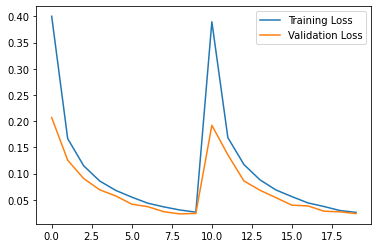

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_loss_history, label='Training Loss')  # Corrected for string quote consistency
plt.plot(val_loss_history, label='Validation Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

Epoch 1 test accuracy: 97.59% validation loss: 0.08139
Epoch 2 test accuracy: 195.18% validation loss: 0.16278
Epoch 3 test accuracy: 292.77% validation loss: 0.24416
Epoch 4 test accuracy: 390.36% validation loss: 0.32555
Epoch 5 test accuracy: 487.95% validation loss: 0.40694
Epoch 6 test accuracy: 585.54% validation loss: 0.48833
Epoch 7 test accuracy: 683.13% validation loss: 0.56971
Epoch 8 test accuracy: 780.72% validation loss: 0.65110
Epoch 9 test accuracy: 878.31% validation loss: 0.73249
Epoch 10 test accuracy: 975.90% validation loss: 0.81388


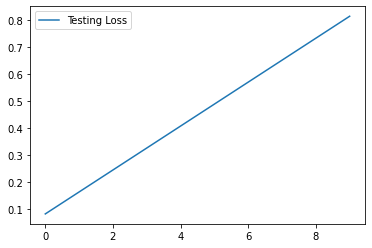

In [16]:
# Assuming torchvision, DataLoader, and transforms are already imported and defined as necessary

# Load the test dataset
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'net' and 'criterion' are already defined and properly initialized
net.to(device)
net.eval()

test_loss = 0.0
test_correct = 0
test_loss_history = []

# Testing loop
for epoch in range(num_epochs):  # num_epochs should be defined, or replace it with a specific number if testing doesn't require epochs
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()

    # Calculate and print statistics after the epoch
    epoch_loss = test_loss / len(test_loader)
    epoch_accuracy = test_correct / len(test_data) * 100
    print(f'Epoch {epoch + 1} test accuracy: {epoch_accuracy:.2f}% validation loss: {epoch_loss:.5f}')
    test_loss_history.append(epoch_loss)

# Plotting the test loss history
import matplotlib.pyplot as plt
plt.plot(test_loss_history, label="Testing Loss")
plt.legend()
plt.show()


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [17]:
## YOUR CODE HERE ##
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# specify loss function
criterion = nn.CrossEntropyLoss()

train_model(net, optimizer, criterion, train_loader, num_epochs = 10)

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 1e-05, 'nesterov': False, 'maximize': False, 'params': [0, 1, 2, 3, 4, 5]}]
Epoch 1 training accuracy: 99.65% training loss: 0.01337
Epoch 1 validation accuracy: 99.76% validation loss: 0.01080
Epoch 2 training accuracy: 99.78% training loss: 0.00981
Epoch 2 validation accuracy: 99.84% validation loss: 0.00814
Epoch 3 training accuracy: 99.84% training loss: 0.00843
Epoch 3 validation accuracy: 99.88% validation loss: 0.00700
Epoch 4 training accuracy: 99.84% training loss: 0.00760
Epoch 4 validation accuracy: 99.92% validation loss: 0.00602
Epoch 5 training accuracy: 99.89% training loss: 0.00647
Epoch 5 validation accuracy: 99.93% validation loss: 0.00528
Epoch 6 training accuracy: 99.91% training loss: 0.00593
Epoch 6 validation accuracy: 99.94% validation loss: 0.00496
Epoch 7 training accuracy: 99.92% training loss: 0.00531
Epoch 7 validation accuracy: 99.95% validation

## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
# Save the state dictionary of the model
torch.save(net.state_dict(), 'model_state_dict.pth')